## 1. WESAD baza Pregled signalov



In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pickle.HIGHEST_PROTOCOL


5

In [2]:
# Nastavi pot do podatkov
data_set = r'WESAD/'
s2_path = data_set + 'S2/S2.pkl'

# P.1 : Nalaganje podatkov ene osebe
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')



In [9]:
# P.2 : Struktura podatkov ene osebe

# Izberi podatke osebe kot data
data = s2_data

# Izpiši podatke
#print(data.keys())
#print(data.items())

print(data['signal'])


{'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14898682],
       [-1.12457275],
       [-1.1520385

Stevilo vzorcev  =  4255300
[      1       2       3 ... 4255298 4255299 4255300]
         label          sec
0            0     0.001429
1            0     0.002857
2            0     0.004286
3            0     0.005714
4            0     0.007143
...        ...          ...
4255295      0  6078.994286
4255296      0  6078.995714
4255297      0  6078.997143
4255298      0  6078.998571
4255299      0  6079.000000

[4255300 rows x 2 columns]


<Axes: xlabel='sec'>

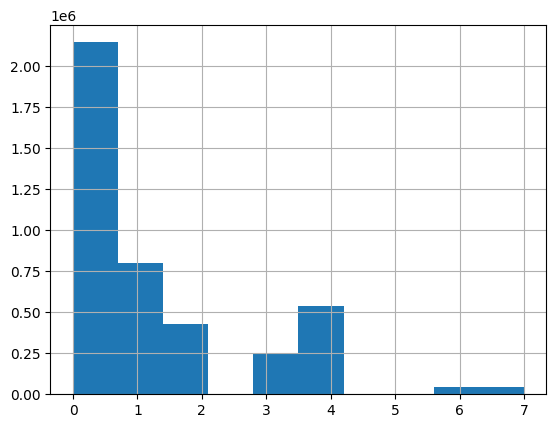

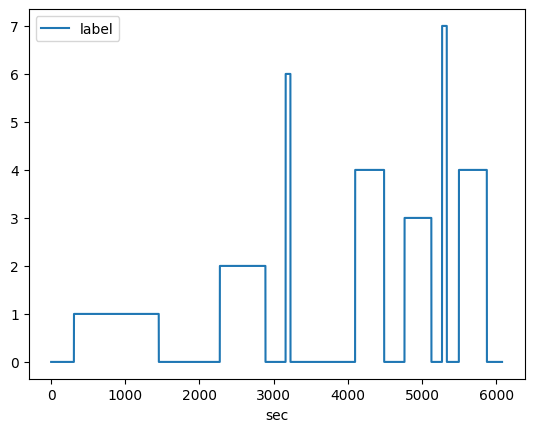

In [10]:
# P.3: Labele: stanja osebe

count=len(data['label'])
print('Stevilo vzorcev  = ', count)

sample_n = np.arange(1,count+1)
print(sample_n)

# Komentar
d_label = pd.DataFrame(data['label'], columns=['label'])
d_label['sec']=d_label['label']
d_label['sec']=sample_n/700
print(d_label)

# Komentar
d_label['label'].hist()
d_label.plot(x='sec', y='label')


In [11]:
c_ax=data['signal']['chest']['ACC'][0:,0]
c_ay=data['signal']['chest']['ACC'][0:,1]
c_az=data['signal']['chest']['ACC'][0:,2]
c_ecg=data['signal']['chest']['ECG'][:,0]
c_emg=data['signal']['chest']['EMG'][:,0]
c_eda=data['signal']['chest']['EDA'][:,0]
c_temp=data['signal']['chest']['Temp'][:,0]
c_resp=data['signal']['chest']['Resp'][:,0]
w_ax=data['signal']['wrist']['ACC'][0:,0]
w_ay=data['signal']['wrist']['ACC'][0:,1]
w_az=data['signal']['wrist']['ACC'][0:,2]
w_bvp=data['signal']['wrist']['BVP'][:,0]
w_eda=data['signal']['wrist']['EDA'][:,0]
w_temp=data['signal']['wrist']['TEMP'][:,0]
c_label=data['label']

print(c_ax.shape)
print(w_ax.shape)
print(c_label.shape)


(4255300,)
(194528,)
(4255300,)


baseline_indices 800800
stress_indices 430500
amusement_indices 253400
meditation_indices 537599


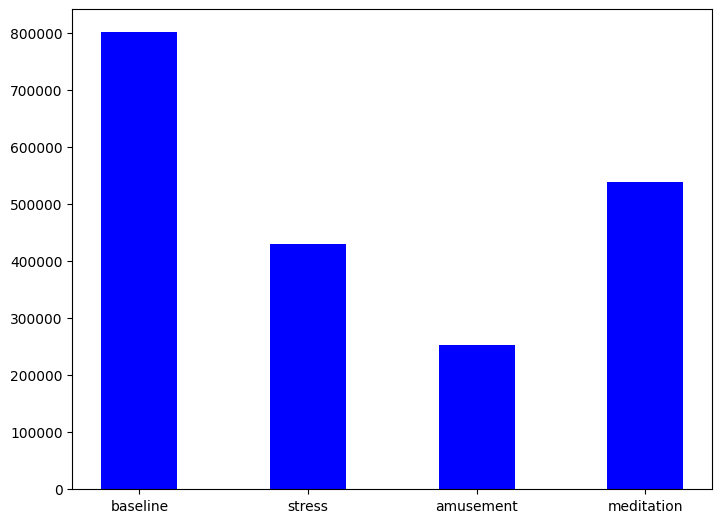

In [12]:
baseline_indices = np.nonzero(data['label']==1)[0]
stress_indices = np.nonzero(data['label']==2)[0]
amusement_indices = np.nonzero(data['label']==3)[0]
meditation_indices = np.nonzero(data['label']==4)[0]

print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,1,1])
langs = ["baseline", "stress", "amusement","meditation"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices)]
ax.bar(langs,y_ax,color = 'b', width = 0.45)
fig.savefig('f1.png')
plt.show()


In [13]:
# P.6 : Naredimo DataFrame z vsemi signali (Chest)

numpy_data1=np.array([sample_n/700, c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,c_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 

# Chest signali
dfc = pd.DataFrame(data=numpy_data1, columns=["sec","c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","c_label"]) 

print("data frame combined")
print(dfc.head())
dfc.info()


data frame combined
        sec    c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0  0.001429  0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1  0.002857  0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2  0.004286  0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3  0.005714  0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4  0.007143  0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   

     c_resp  c_label  
0 -1.148987      0.0  
1 -1.124573      0.0  
2 -1.152039      0.0  
3 -1.158142      0.0  
4 -1.161194      0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255300 entries, 0 to 4255299
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   sec      float64
 1   c_ax     float64
 2   c_ay     float64
 3   c_az     float64
 4   c_ecg    float64
 5   c_emg    float64
 6   c_eda    float64
 7   c_temp   float64
 8   c_resp   float64
 9   c

In [14]:
# P.7 Statistika vrednosti
dfc.describe()


,sec,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,c_label
count,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06
mean,3.039501e+03,7.538656e-01,-1.331884e-01,-4.226812e-01,1.212245e-03,-2.412918e-03,1.528387e+00,3.087668e+01,5.490614e-02,1.212370e+00
std,1.754856e+03,1.751162e-01,6.417297e-02,3.002357e-01,1.540773e-01,1.165187e-02,1.238425e+00,1.281106e+00,2.917749e+00,1.606596e+00
min,1.428571e-03,2.150000e-01,-6.600000e-01,-1.135400e+00,-1.499542e+00,-4.149628e-01,2.632141e-01,2.804526e+01,-2.790375e+01,0.000000e+00
25%,1.519751e+03,6.210001e-01,-1.498000e-01,-7.172000e-01,-6.797791e-02,-8.331299e-03,7.995605e-01,3.057495e+01,-1.481628e+00,0.000000e+00
50%,3.039501e+03,8.568000e-01,-1.256000e-01,-3.222000e-01,8.239746e-03,-1.602173e-03,1.163101e+00,3.128992e+01,-1.571655e-01,0.000000e+00
75%,4.559250e+03,8.922000e-01,-9.579998e-02,-2.098000e-01,4.435730e-02,3.982544e-03,1.546478e+00,3.181512e+01,1.618958e+00,2.000000e+00
max,6.079000e+03,2.029800e+00,5.390000e-01,1.246800e+00,1.499313e+00,3.009796e-01,7.576752e+00,3.437039e+01,2.737885e+01,7.000000e+00


array([[<Axes: title={'center': 'sec'}>,
        <Axes: title={'center': 'c_ax'}>,
        <Axes: title={'center': 'c_ay'}>],
       [<Axes: title={'center': 'c_az'}>,
        <Axes: title={'center': 'c_ecg'}>,
        <Axes: title={'center': 'c_emg'}>],
       [<Axes: title={'center': 'c_eda'}>,
        <Axes: title={'center': 'c_temp'}>,
        <Axes: title={'center': 'c_resp'}>],
       [<Axes: title={'center': 'c_label'}>, <Axes: >, <Axes: >]],
      dtype=object)

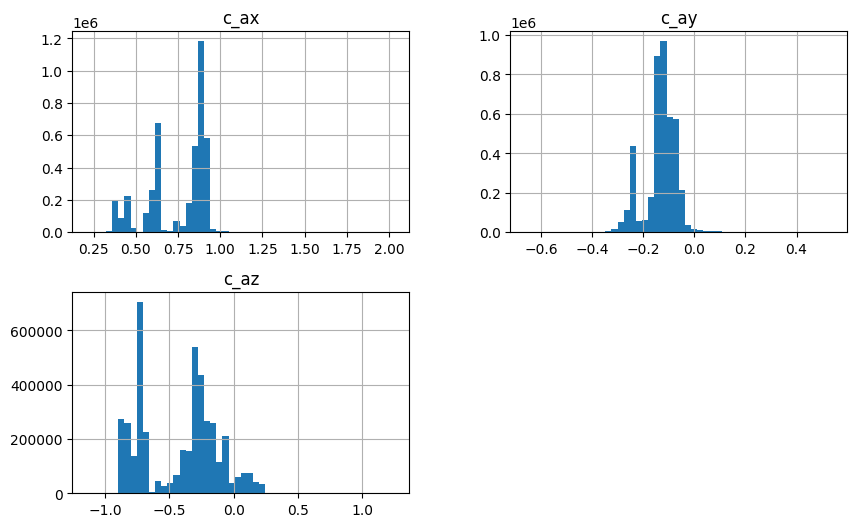

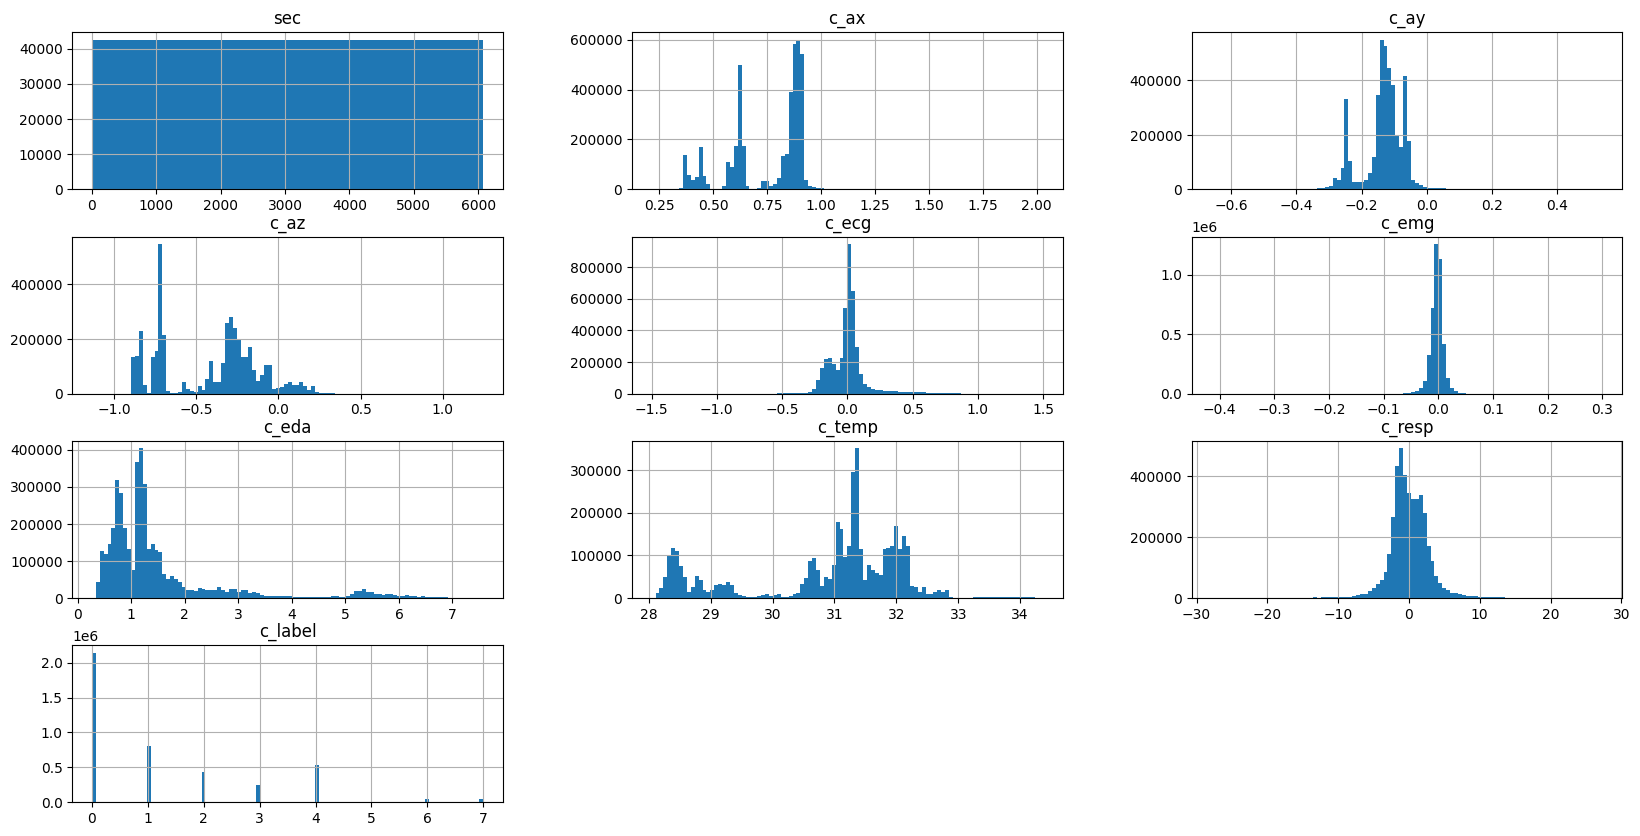

In [15]:
# P.8 Histogrami vrednosti
dfc.hist(column=['c_ax','c_ay','c_az'], bins=50, figsize=(10,6))
dfc.hist(bins=100, figsize=(20,10))


In [16]:
dfc_base = dfc.loc[(dfc['c_label'] == 1)]
dfc_stress = dfc.loc[(dfc['c_label'] == 2)]
dfc_amus = dfc.loc[(dfc['c_label'] == 3)]
dfc_medi = dfc.loc[(dfc['c_label'] == 4)]

print("Baseline samples: ", dfc_base.shape)
print("Stress samples: ", dfc_stress.shape)


Baseline samples:  (800800, 10)
Stress samples:  (430500, 10)


In [17]:
ind_b = dfc['c_label']==1
ind_s = dfc['c_label']==2
ind_base_stress =  (dfc['c_label']==1) | (dfc['c_label']==2)

# Dataframe baseline, stres
dfc_base_str = dfc.loc[ind_base_stress]
print(dfc_base_str.shape)


(1231300, 10)


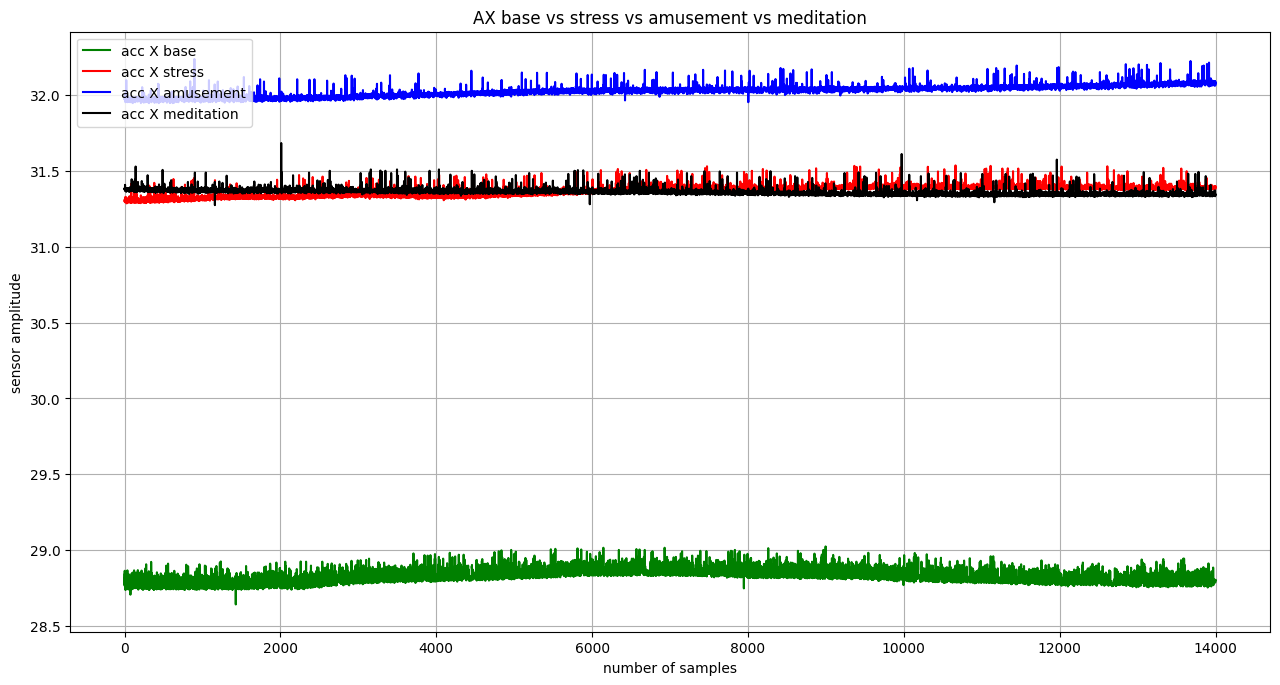

In [31]:
# P.10 Izris signalov

sample_beg = 120000
sample_length = 10000

window_sec = 20
sample_length = 700*window_sec
sample_end = sample_beg + sample_length

type = "c_temp"
y_ax =  dfc_base[type].iloc[sample_beg:sample_end].values
y_ax_s= dfc_stress[type].iloc[sample_beg:sample_end].values
y_ax_a= dfc_amus[type].iloc[sample_beg:sample_end].values
y_ax_m= dfc_medi[type].iloc[sample_beg:sample_end].values
x_ax=np.arange(len(y_ax))

fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
#fig1, ax1 = plt.subplots()
ax1.plot(x_ax,y_ax,color='green',label="acc X base")
ax1.plot(x_ax,y_ax_s,color='red',label="acc X stress")
ax1.plot(x_ax,y_ax_a,color='blue',label="acc X amusement")
ax1.plot(x_ax,y_ax_m,color='black',label="acc X meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AX base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='upper left')
plt.show()


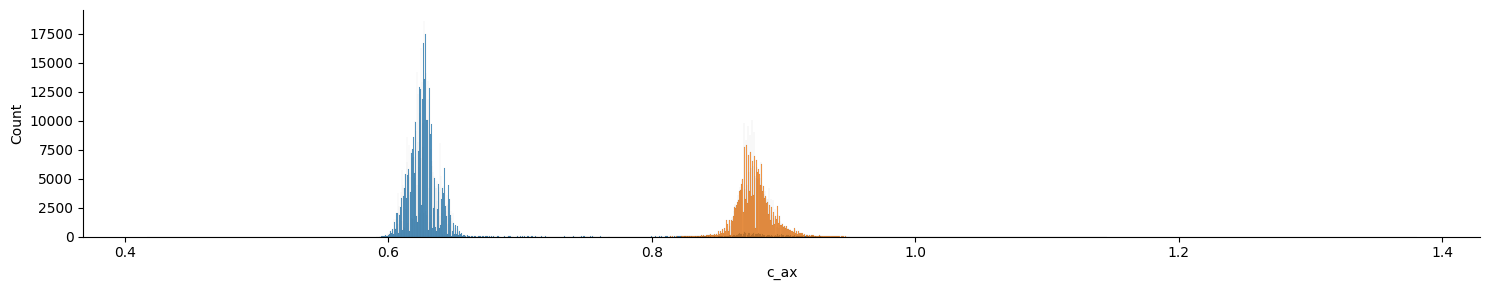

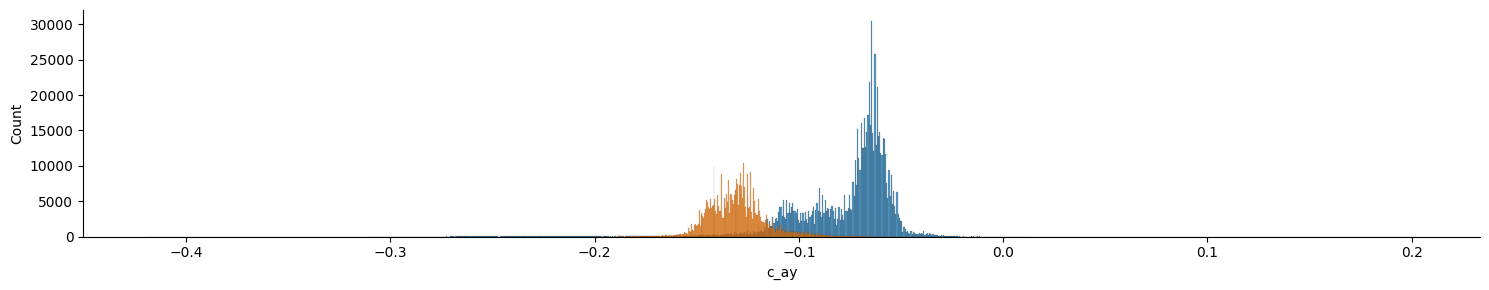

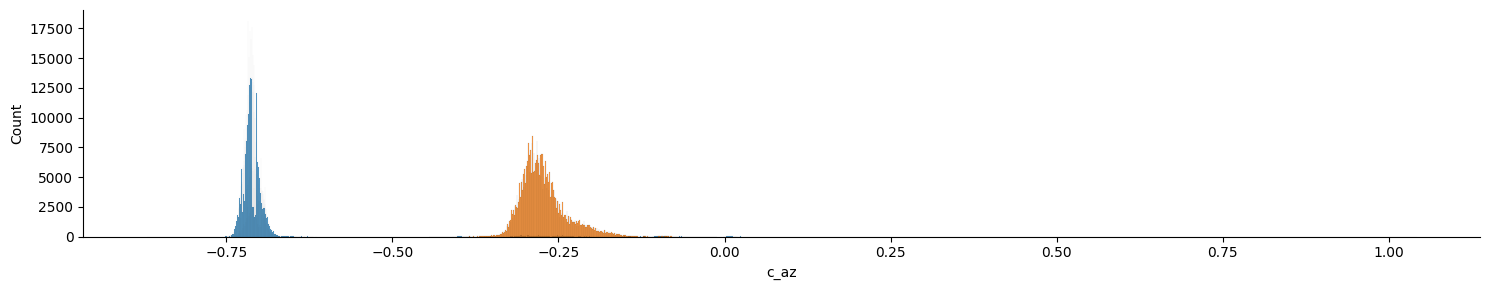

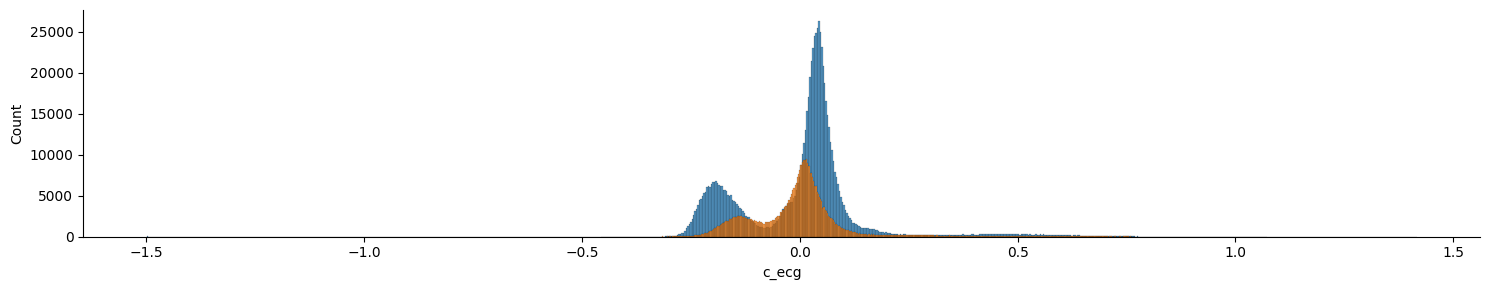

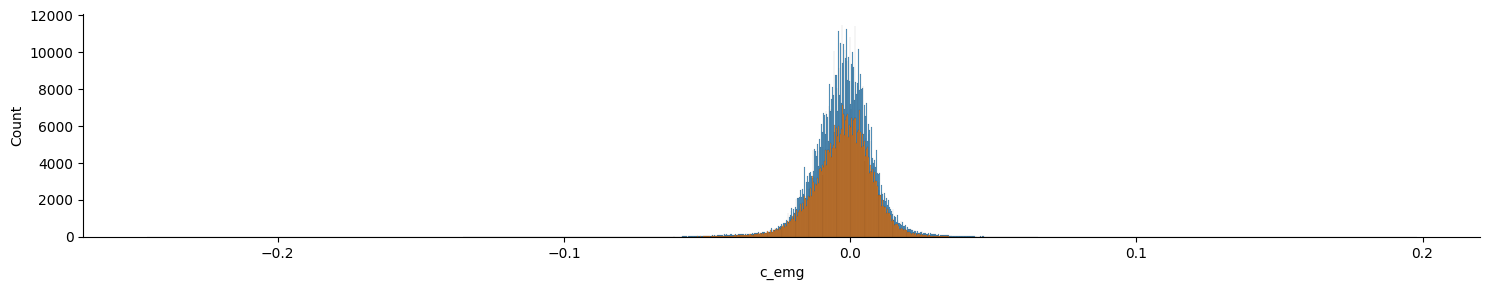

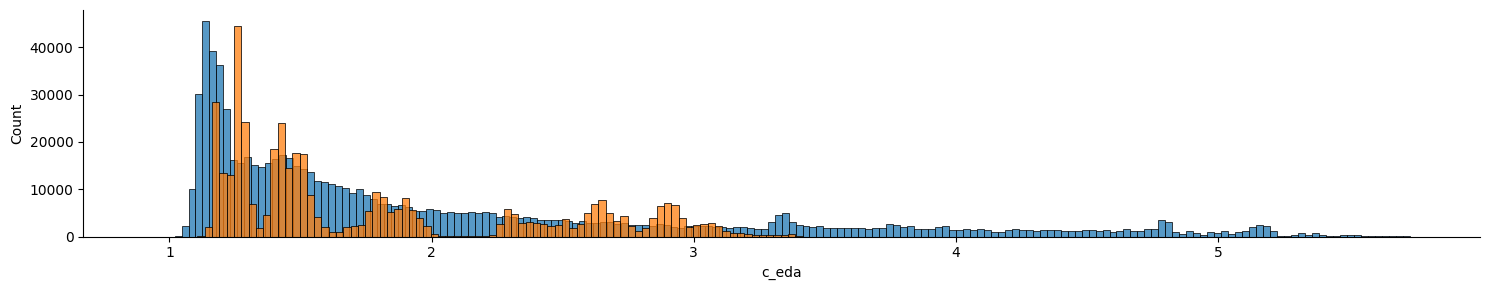

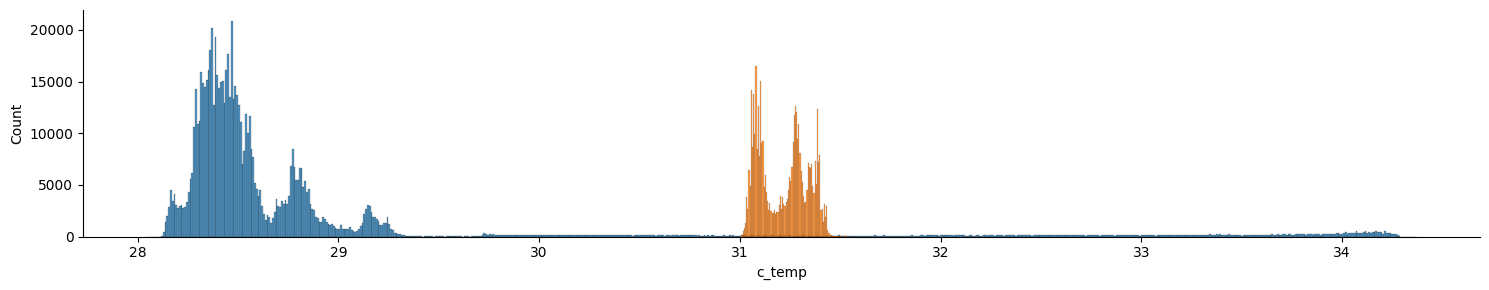

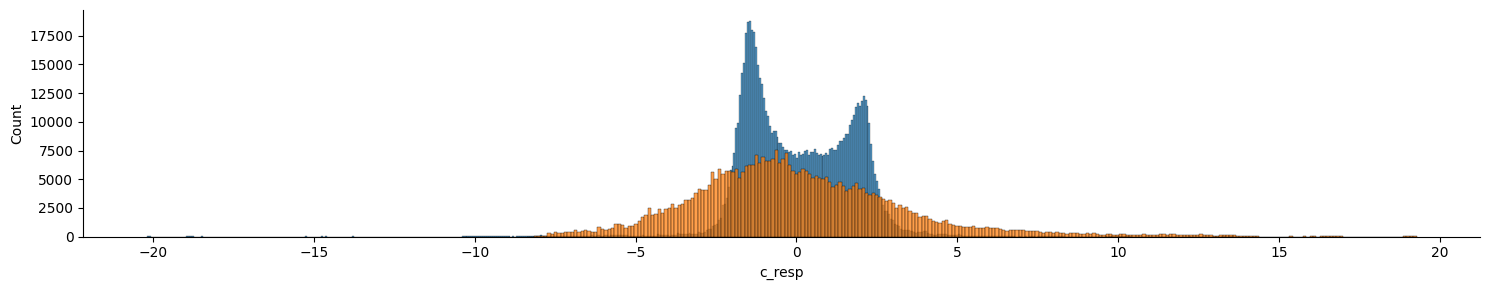

In [23]:
import seaborn as sns

for col in dfc_base_str.columns[1:9]:
    fg = sns.FacetGrid(dfc_base_str, hue="c_label", aspect=5)
    fg.map(sns.histplot, col, fill=True)
plt.show()


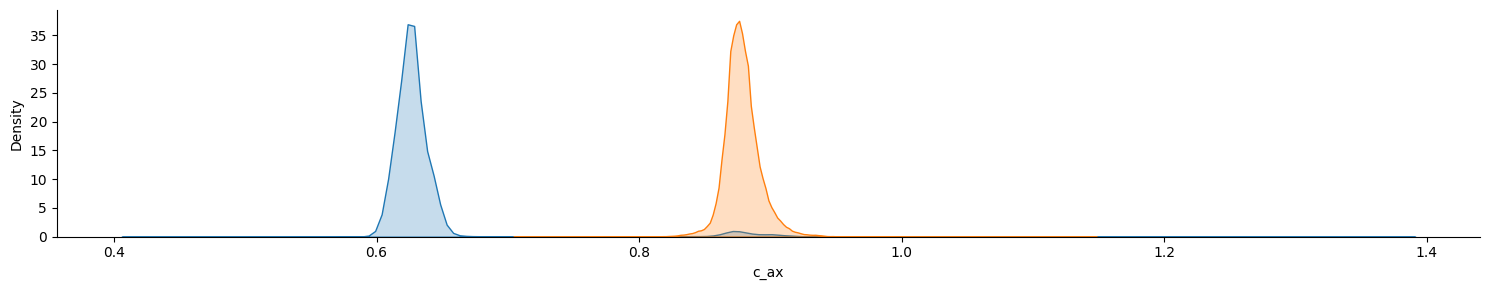

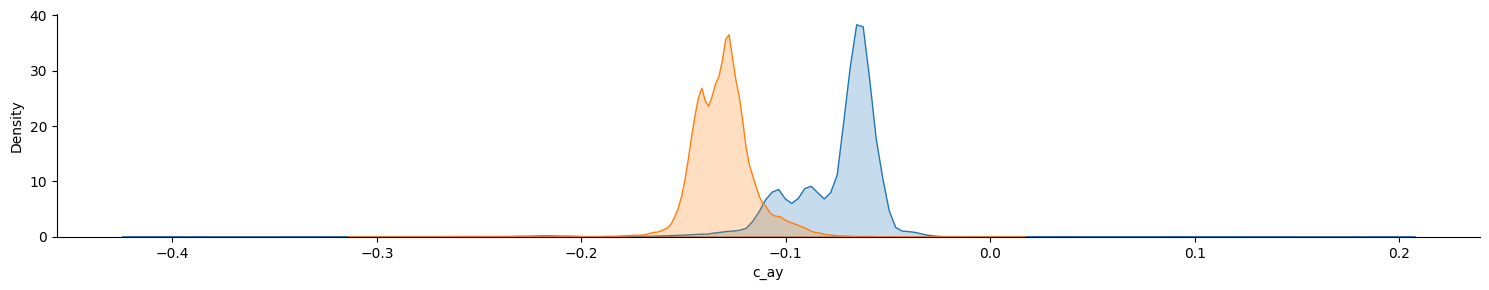

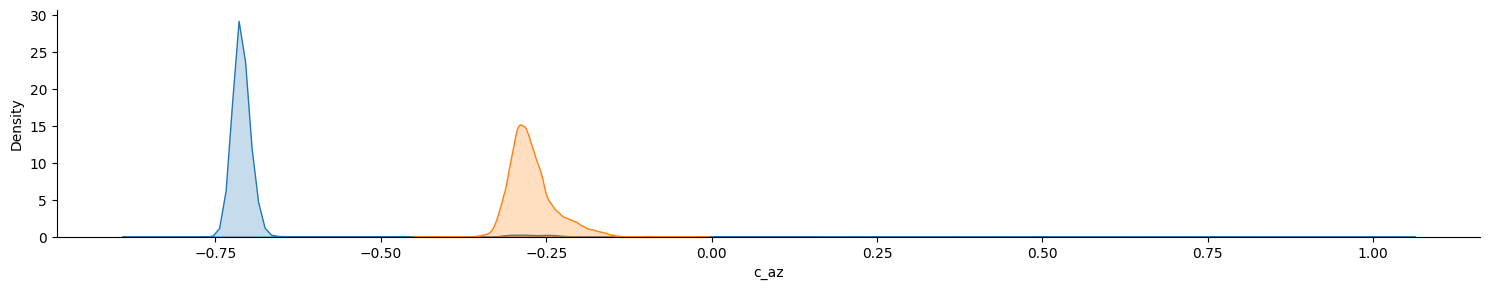

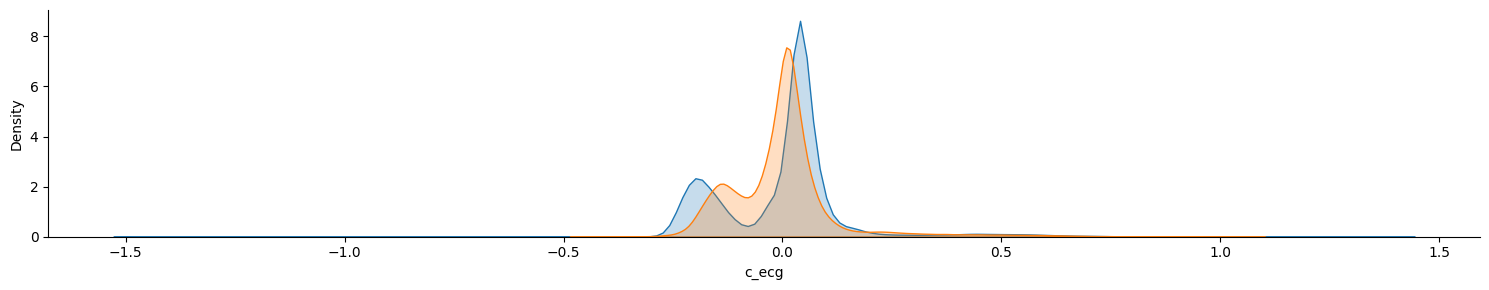

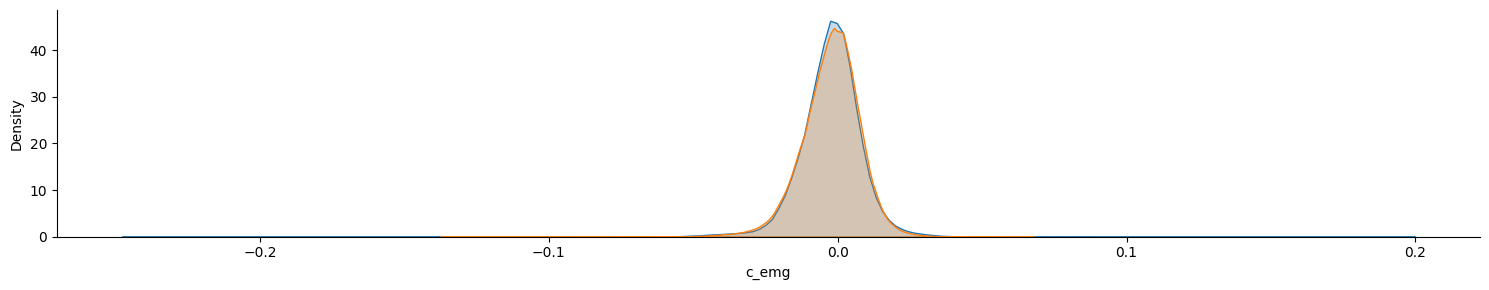

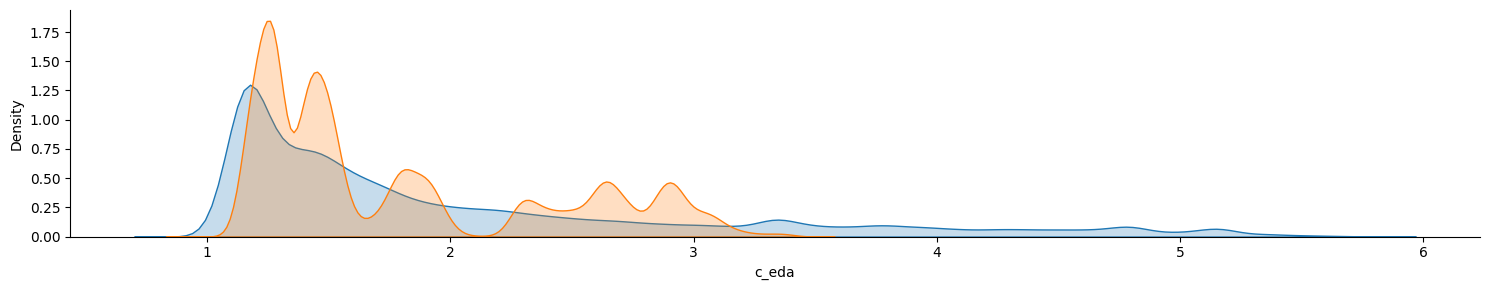

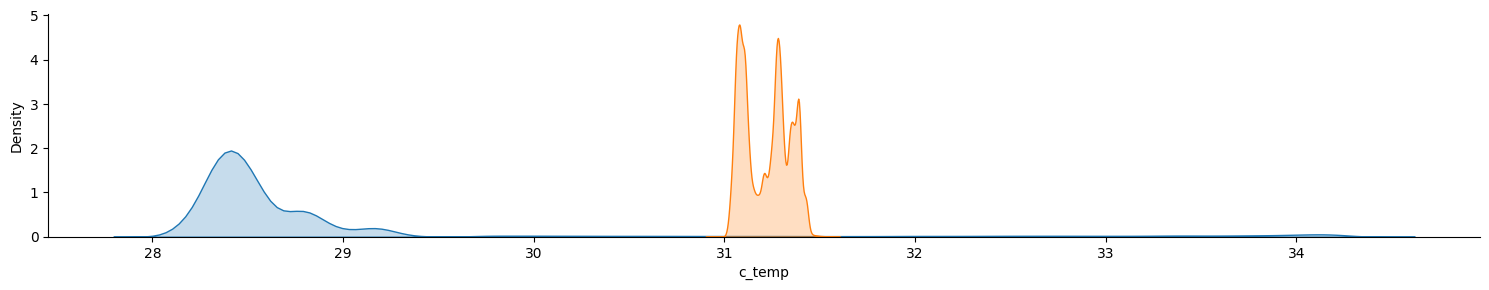

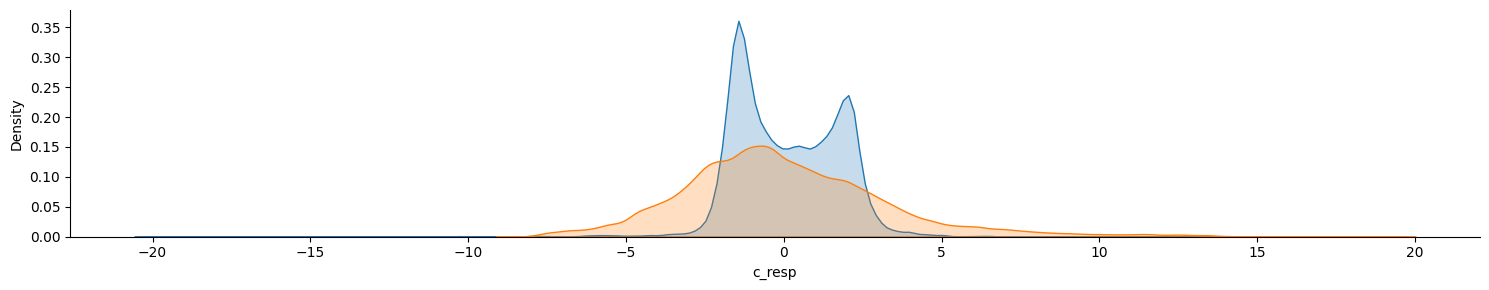

In [24]:
for col in dfc_base_str.columns[1:9]:
    fg = sns.FacetGrid(dfc_base_str, hue="c_label", aspect=5)
    fg.map(sns.kdeplot, col, fill=True)
plt.show()
